## <font color=blue>Diabetes dataset<font>

In [34]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, \
f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from tqdm import tqdm

# df = pd.read_csv("diabetic_data.csv", dtype='category').iloc[:500,2:]
df = pd.read_csv("diabetic_data.csv", dtype='category').iloc[:,2:]
df.shape

(101766, 48)

In [35]:
df.head(2)

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),?,1,1,7,3,?,?,...,No,Up,No,No,No,No,No,Ch,Yes,>30


In [36]:
df.describe()

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
count,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,...,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766
unique,6,3,10,10,8,26,17,14,18,73,...,1,4,4,2,2,2,2,2,2,3
top,Caucasian,Female,[70-80),?,1,1,7,3,?,?,...,No,No,No,No,No,No,No,No,Yes,NO
freq,76099,54708,26068,98569,53990,60234,57494,17756,40256,49949,...,101766,47383,101060,101753,101765,101764,101765,54755,78363,54864


In [37]:
def show_unique(dataF):
    for c in dataF.columns:
        print(c, dataF[c].unique())
        print('*'*50)

show_unique(df)

race [Caucasian, AfricanAmerican, ?, Other, Asian, Hispanic]
Categories (6, object): [Caucasian, AfricanAmerican, ?, Other, Asian, Hispanic]
**************************************************
gender [Female, Male, Unknown/Invalid]
Categories (3, object): [Female, Male, Unknown/Invalid]
**************************************************
age [[0-10), [10-20), [20-30), [30-40), [40-50), [50-60), [60-70), [70-80), [80-90), [90-100)]
Categories (10, object): [[0-10), [10-20), [20-30), [30-40), ..., [60-70), [70-80), [80-90), [90-100)]
**************************************************
weight [?, [75-100), [50-75), [0-25), [100-125), [25-50), [125-150), [175-200), [150-175), >200]
Categories (10, object): [?, [75-100), [50-75), [0-25), ..., [125-150), [175-200), [150-175), >200]
**************************************************
admission_type_id [6, 1, 2, 3, 4, 5, 8, 7]
Categories (8, object): [6, 1, 2, 3, 4, 5, 8, 7]
**************************************************
discharge_disposition_

### <font color =blue>1. remove columns with missing data</font>

In [38]:
df = df.drop(columns=['weight', 'payer_code', 'medical_specialty'])
df.head(2)

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6,25,1,1,41,0,1,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),1,1,7,3,59,0,18,...,No,Up,No,No,No,No,No,Ch,Yes,>30


### <font color=blue> 2. remove incomplete columns and rows </font>

In [39]:
# drop missing values
df = df.replace('?', np.nan)
df = df.replace('Unknown/Invalid', np.nan)
df = df.dropna()
df.shape

(98052, 45)

In [40]:
df = df.drop(columns= df.columns[df.nunique() == 1])

In [41]:
show_unique(df)

race [Caucasian, AfricanAmerican, Other, Asian, Hispanic]
Categories (5, object): [Caucasian, AfricanAmerican, Other, Asian, Hispanic]
**************************************************
gender [Female, Male]
Categories (2, object): [Female, Male]
**************************************************
age [[10-20), [20-30), [30-40), [40-50), [50-60), [60-70), [70-80), [80-90), [90-100), [0-10)]
Categories (10, object): [[10-20), [20-30), [30-40), [40-50), ..., [70-80), [80-90), [90-100), [0-10)]
**************************************************
admission_type_id [1, 2, 3, 6, 4, 5, 8, 7]
Categories (8, object): [1, 2, 3, 6, 4, 5, 8, 7]
**************************************************
discharge_disposition_id [1, 3, 6, 2, 5, ..., 15, 24, 28, 19, 27]
Length: 26
Categories (26, object): [1, 3, 6, 2, ..., 24, 28, 19, 27]
**************************************************
admission_source_id [7, 2, 4, 1, 5, ..., 10, 22, 11, 25, 13]
Length: 17
Categories (17, object): [7, 2, 4, 1, ..., 22, 11, 

### <font color = blue>3. categorical variables</font>

In [42]:
to_num = ['time_in_hospital', 'num_lab_procedures', 'num_procedures',
         'num_medications', 'number_outpatient', 'number_emergency',
         'number_inpatient', 'number_diagnoses']

to_cat_codes = list(set(df.columns) - set(to_num))

In [43]:
X_features = list(to_num)
for c in to_cat_codes:
    df[c+'_cat'] = df[c].cat.codes        
    X_features += [c+'_cat']
    
X_features.remove('readmitted_cat')
X_features

['time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses',
 'A1Cresult_cat',
 'chlorpropamide_cat',
 'diag_2_cat',
 'tolbutamide_cat',
 'admission_source_id_cat',
 'insulin_cat',
 'rosiglitazone_cat',
 'nateglinide_cat',
 'discharge_disposition_id_cat',
 'troglitazone_cat',
 'change_cat',
 'diag_1_cat',
 'race_cat',
 'admission_type_id_cat',
 'glyburide_cat',
 'tolazamide_cat',
 'glipizide_cat',
 'max_glu_serum_cat',
 'miglitol_cat',
 'diabetesMed_cat',
 'glimepiride-pioglitazone_cat',
 'gender_cat',
 'glimepiride_cat',
 'glipizide-metformin_cat',
 'glyburide-metformin_cat',
 'age_cat',
 'diag_3_cat',
 'repaglinide_cat',
 'pioglitazone_cat',
 'metformin-pioglitazone_cat',
 'acarbose_cat',
 'acetohexamide_cat',
 'metformin_cat']

In [44]:
df['readmitted'].head(11)

1     >30
2      NO
3      NO
4      NO
5     >30
6      NO
7     >30
8      NO
9      NO
10    >30
11    <30
Name: readmitted, dtype: category
Categories (3, object): [<30, >30, NO]

In [45]:
df['readmitted_cat'].head(11)

1     1
2     2
3     2
4     2
5     1
6     2
7     1
8     2
9     2
10    1
11    0
Name: readmitted_cat, dtype: int8

#### <font color=red>Target Mapping: < 30 = 0, >30 = 1, NO = 2, </font>

### <font color=blue>4. split</font>

In [46]:
for n in to_num:
    df[n] = df[n].astype('int')

df[to_num].dtypes

time_in_hospital      int64
num_lab_procedures    int64
num_procedures        int64
num_medications       int64
number_outpatient     int64
number_emergency      int64
number_inpatient      int64
number_diagnoses      int64
dtype: object

In [47]:
X_train, X_test, y_train, y_test = train_test_split(
    df[X_features], df['readmitted_cat'] , random_state = 0)

In [48]:
X_train.head(2)

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,A1Cresult_cat,chlorpropamide_cat,...,glipizide-metformin_cat,glyburide-metformin_cat,age_cat,diag_3_cat,repaglinide_cat,pioglitazone_cat,metformin-pioglitazone_cat,acarbose_cat,acetohexamide_cat,metformin_cat
71878,5,50,1,23,0,0,0,9,2,1,...,0,1,6,23,1,1,0,0,0,1
58959,7,70,2,32,0,0,3,9,2,1,...,0,1,7,189,1,1,0,0,0,1


In [49]:
y_train.head(2)

71878    0
58959    2
Name: readmitted_cat, dtype: int8

In [50]:
X_test.head(2)

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,A1Cresult_cat,chlorpropamide_cat,...,glipizide-metformin_cat,glyburide-metformin_cat,age_cat,diag_3_cat,repaglinide_cat,pioglitazone_cat,metformin-pioglitazone_cat,acarbose_cat,acetohexamide_cat,metformin_cat
101706,3,66,1,18,0,0,1,9,0,1,...,0,1,7,221,1,2,0,0,0,1
73363,2,4,0,11,1,0,1,7,2,1,...,0,1,5,46,1,1,0,0,0,1


In [51]:
y_test.head(2)

101706    1
73363     1
Name: readmitted_cat, dtype: int8

### <font color=blue>5. min max scaling</font>

In [52]:
X_train.dtypes

time_in_hospital                int64
num_lab_procedures              int64
num_procedures                  int64
num_medications                 int64
number_outpatient               int64
number_emergency                int64
number_inpatient                int64
number_diagnoses                int64
A1Cresult_cat                    int8
chlorpropamide_cat               int8
diag_2_cat                      int16
tolbutamide_cat                  int8
admission_source_id_cat          int8
insulin_cat                      int8
rosiglitazone_cat                int8
nateglinide_cat                  int8
discharge_disposition_id_cat     int8
troglitazone_cat                 int8
change_cat                       int8
diag_1_cat                      int16
race_cat                         int8
admission_type_id_cat            int8
glyburide_cat                    int8
tolazamide_cat                   int8
glipizide_cat                    int8
max_glu_serum_cat                int8
miglitol_cat

#### before scale

In [53]:
X_train.describe()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,A1Cresult_cat,chlorpropamide_cat,...,glipizide-metformin_cat,glyburide-metformin_cat,age_cat,diag_3_cat,repaglinide_cat,pioglitazone_cat,metformin-pioglitazone_cat,acarbose_cat,acetohexamide_cat,metformin_cat
count,73539.000000,73539.000000,73539.000000,73539.0000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,...,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.0,73539.000000
mean,4.427678,43.155305,1.348998,16.0989,0.372496,0.201988,0.646229,7.509974,1.895783,1.000911,...,0.000122,1.006772,6.120684,202.153225,1.015801,1.071663,0.000014,0.003155,0.0,1.195121
std,3.000109,19.748888,1.704406,8.0961,1.254258,0.930706,1.264435,1.833319,0.517859,0.032763,...,0.011062,0.083329,1.559598,137.354758,0.136970,0.271041,0.003688,0.059148,0.0,0.434937
min,1.000000,1.000000,0.000000,1.0000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,2.000000,31.000000,0.000000,11.0000,0.000000,0.000000,0.000000,6.000000,2.000000,1.000000,...,0.000000,1.000000,5.000000,90.000000,1.000000,1.000000,0.000000,0.000000,0.0,1.000000
50%,4.000000,44.000000,1.000000,15.0000,0.000000,0.000000,0.000000,8.000000,2.000000,1.000000,...,0.000000,1.000000,6.000000,182.000000,1.000000,1.000000,0.000000,0.000000,0.0,1.000000
75%,6.000000,57.000000,2.000000,20.0000,0.000000,0.000000,1.000000,9.000000,2.000000,1.000000,...,0.000000,1.000000,7.000000,273.000000,1.000000,1.000000,0.000000,0.000000,0.0,1.000000
max,14.000000,129.000000,6.000000,79.0000,42.000000,76.000000,21.000000,16.000000,3.000000,3.000000,...,1.000000,3.000000,9.000000,789.000000,3.000000,3.000000,1.000000,3.000000,0.0,3.000000


In [54]:
X_test.describe()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,A1Cresult_cat,chlorpropamide_cat,...,glipizide-metformin_cat,glyburide-metformin_cat,age_cat,diag_3_cat,repaglinide_cat,pioglitazone_cat,metformin-pioglitazone_cat,acarbose_cat,acetohexamide_cat,metformin_cat
count,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.00000,24513.000000,...,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.0,24513.000000,24513.000000,24513.000000
mean,4.405010,43.127932,1.355852,16.181659,0.388039,0.203892,0.648799,7.518460,1.89683,1.000816,...,0.000163,1.006976,6.142047,202.719455,1.015420,1.074409,0.0,0.003386,0.000041,1.196263
std,2.971848,19.600328,1.720647,8.145418,1.366935,0.978576,1.290618,1.829952,0.51638,0.029948,...,0.012773,0.083720,1.557448,136.473911,0.134005,0.275634,0.0,0.062163,0.006387,0.435117
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.00000,1.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,2.000000,32.000000,0.000000,11.000000,0.000000,0.000000,0.000000,6.000000,2.00000,1.000000,...,0.000000,1.000000,5.000000,90.000000,1.000000,1.000000,0.0,0.000000,0.000000,1.000000
50%,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000,2.00000,1.000000,...,0.000000,1.000000,6.000000,182.000000,1.000000,1.000000,0.0,0.000000,0.000000,1.000000
75%,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000,2.00000,1.000000,...,0.000000,1.000000,7.000000,272.000000,1.000000,1.000000,0.0,0.000000,0.000000,1.000000
max,14.000000,132.000000,6.000000,81.000000,40.000000,63.000000,16.000000,16.000000,3.00000,3.000000,...,1.000000,3.000000,9.000000,784.000000,3.000000,3.000000,0.0,3.000000,1.000000,3.000000


In [55]:
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_features)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_features)

#### after scale

In [56]:
X_train.iloc[:,:20].describe()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,A1Cresult_cat,chlorpropamide_cat,diag_2_cat,tolbutamide_cat,admission_source_id_cat,insulin_cat,rosiglitazone_cat,nateglinide_cat,discharge_disposition_id_cat,troglitazone_cat,change_cat,diag_1_cat
count,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000
mean,0.263668,0.329338,0.224833,0.193576,0.008869,0.002658,0.030773,0.346921,0.631928,0.333637,0.267631,0.000231,0.333784,0.466406,0.354497,0.002597,0.210068,0.000027,0.540040,0.356752
std,0.230778,0.154288,0.284068,0.103796,0.029863,0.012246,0.060211,0.141025,0.172620,0.010921,0.152373,0.015203,0.246454,0.278901,0.084722,0.032113,0.267686,0.005215,0.498398,0.170712
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.076923,0.234375,0.000000,0.128205,0.000000,0.000000,0.000000,0.230769,0.666667,0.333333,0.132530,0.000000,0.000000,0.333333,0.333333,0.000000,0.000000,0.000000,0.000000,0.265363
50%,0.230769,0.335938,0.166667,0.179487,0.000000,0.000000,0.000000,0.384615,0.666667,0.333333,0.251673,0.000000,0.533333,0.333333,0.333333,0.000000,0.000000,0.000000,1.000000,0.318436
75%,0.384615,0.437500,0.333333,0.243590,0.000000,0.000000,0.047619,0.461538,0.666667,0.333333,0.368139,0.000000,0.533333,0.666667,0.333333,0.000000,0.520000,0.000000,1.000000,0.488827
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [57]:
X_train.iloc[:,21:40].describe()

,admission_type_id_cat,glyburide_cat,tolazamide_cat,glipizide_cat,max_glu_serum_cat,miglitol_cat,diabetesMed_cat,glimepiride-pioglitazone_cat,gender_cat,glimepiride_cat,glipizide-metformin_cat,glyburide-metformin_cat,age_cat,diag_3_cat,repaglinide_cat,pioglitazone_cat,metformin-pioglitazone_cat,acarbose_cat,acetohexamide_cat
count,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.0
mean,0.146428,0.367279,0.000340,0.373838,0.661318,0.000141,0.766355,0.000014,0.461850,0.350077,0.000122,0.335591,0.680076,0.256214,0.338600,0.357221,0.000014,0.001052,0.0
std,0.205807,0.114944,0.018435,0.121723,0.104091,0.008059,0.423152,0.003688,0.498546,0.080214,0.011062,0.027776,0.173289,0.174087,0.045657,0.090347,0.003688,0.019716,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.333333,0.000000,0.333333,0.666667,0.000000,1.000000,0.000000,0.000000,0.333333,0.000000,0.333333,0.555556,0.114068,0.333333,0.333333,0.000000,0.000000,0.0
50%,0.000000,0.333333,0.000000,0.333333,0.666667,0.000000,1.000000,0.000000,0.000000,0.333333,0.000000,0.333333,0.666667,0.230672,0.333333,0.333333,0.000000,0.000000,0.0
75%,0.285714,0.333333,0.000000,0.333333,0.666667,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,0.333333,0.777778,0.346008,0.333333,0.333333,0.000000,0.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [58]:
y_train.describe()

count    73539.000000
mean         1.423068
std          0.684500
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          2.000000
Name: readmitted_cat, dtype: float64

In [59]:
X_test.shape

(24513, 41)

In [60]:
X_test.iloc[:,:20].describe()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,A1Cresult_cat,chlorpropamide_cat,diag_2_cat,tolbutamide_cat,admission_source_id_cat,insulin_cat,rosiglitazone_cat,nateglinide_cat,discharge_disposition_id_cat,troglitazone_cat,change_cat,diag_1_cat
count,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000
mean,0.261924,0.329124,0.225975,0.194637,0.009239,0.002683,0.030895,0.347574,0.632277,0.333605,0.268786,0.000204,0.335291,0.468840,0.353771,0.002380,0.208241,0.000041,0.532779,0.357147
std,0.228604,0.153128,0.286775,0.104428,0.032546,0.012876,0.061458,0.140766,0.172127,0.009983,0.153605,0.014281,0.246326,0.282084,0.083790,0.031561,0.266952,0.006387,0.498935,0.170499
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.076923,0.242188,0.000000,0.128205,0.000000,0.000000,0.000000,0.230769,0.666667,0.333333,0.132530,0.000000,0.000000,0.333333,0.333333,0.000000,0.000000,0.000000,0.000000,0.265363
50%,0.230769,0.335938,0.166667,0.179487,0.000000,0.000000,0.000000,0.384615,0.666667,0.333333,0.251673,0.000000,0.533333,0.333333,0.333333,0.000000,0.000000,0.000000,1.000000,0.314246
75%,0.384615,0.437500,0.333333,0.243590,0.000000,0.000000,0.047619,0.461538,0.666667,0.333333,0.369478,0.000000,0.533333,0.666667,0.333333,0.000000,0.520000,0.000000,1.000000,0.488827
max,1.000000,1.023438,1.000000,1.025641,0.952381,0.828947,0.761905,1.000000,1.000000,1.000000,1.001339,1.000000,1.066667,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.998603


In [61]:
X_test.iloc[:,21:40].describe()

,admission_type_id_cat,glyburide_cat,tolazamide_cat,glipizide_cat,max_glu_serum_cat,miglitol_cat,diabetesMed_cat,glimepiride-pioglitazone_cat,gender_cat,glimepiride_cat,glipizide-metformin_cat,glyburide-metformin_cat,age_cat,diag_3_cat,repaglinide_cat,pioglitazone_cat,metformin-pioglitazone_cat,acarbose_cat,acetohexamide_cat
count,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.0,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.0,24513.000000,24513.000000
mean,0.145188,0.367152,0.000530,0.374359,0.661051,0.000190,0.774813,0.0,0.459144,0.350195,0.000163,0.335659,0.682450,0.256932,0.338473,0.358136,0.0,0.001129,0.000041
std,0.204768,0.114152,0.024732,0.121854,0.103387,0.009984,0.417714,0.0,0.498338,0.080378,0.012773,0.027907,0.173050,0.172971,0.044668,0.091878,0.0,0.020721,0.006387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.333333,0.000000,0.001267,0.000000,0.000000,0.0,0.000000,0.000000
25%,0.000000,0.333333,0.000000,0.333333,0.666667,0.000000,1.000000,0.0,0.000000,0.333333,0.000000,0.333333,0.555556,0.114068,0.333333,0.333333,0.0,0.000000,0.000000
50%,0.000000,0.333333,0.000000,0.333333,0.666667,0.000000,1.000000,0.0,0.000000,0.333333,0.000000,0.333333,0.666667,0.230672,0.333333,0.333333,0.0,0.000000,0.000000
75%,0.285714,0.333333,0.000000,0.333333,0.666667,0.000000,1.000000,0.0,1.000000,0.333333,0.000000,0.333333,0.777778,0.344740,0.333333,0.333333,0.0,0.000000,0.000000
max,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.993663,1.000000,1.000000,0.0,1.000000,1.000000


In [62]:
y_test.describe()

count    24513.000000
mean         1.414433
std          0.687174
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          2.000000
Name: readmitted_cat, dtype: float64

## <font color=green> Baseline</font>

In [63]:
from sklearn.dummy import DummyClassifier

d_major = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)

print('train accuracy: {:.2f}'.format(d_major.score(X_train, y_train)))
print('test accuracy: {:.2f}'.format(d_major.score(X_test, y_test)))

train accuracy: 0.54
test accuracy: 0.53


<IPython.core.display.Javascript object>


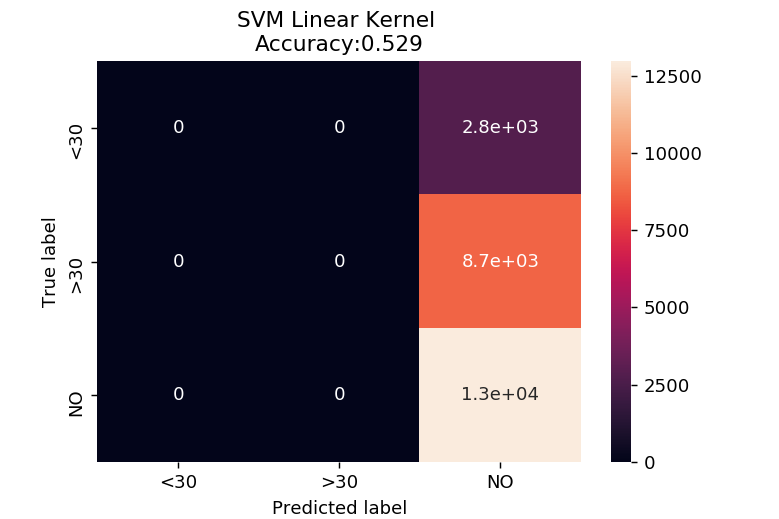

Micro-averaged precision = 0.53 (treat instances equally)
Macro-averaged precision = 0.18 (treat classes equally)
Micro-averaged f1 = 0.53 (treat instances equally)
Macro-averaged f1 = 0.23 (treat classes equally)
             precision    recall  f1-score   support

          0       0.00      0.00      0.00      2813
          1       0.00      0.00      0.00      8728
          2       0.53      1.00      0.69     12972

avg / total       0.28      0.53      0.37     24513



/home/lam/anaconda2/envs/my_env3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/lam/anaconda2/envs/my_env3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/lam/anaconda2/envs/my_env3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [64]:
def plot_confusion(clf):
    svm_predicted_mc = clf.predict(X_test)
    confusion_mc = confusion_matrix(y_test, svm_predicted_mc)
    df_cm = pd.DataFrame(confusion_mc, 
                         index = [i for i in range(0,3)], columns = [i for i in range(0,3)])

    plt.figure(figsize=(6,4))
    ax_ticks= ['<30', '>30', 'NO']
    sns.heatmap(df_cm, annot=True, xticklabels=ax_ticks, yticklabels=ax_ticks)
    plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, 
                                                                           svm_predicted_mc)))
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    print('Micro-averaged precision = {:.2f} (treat instances equally)'
      .format(precision_score(y_test, svm_predicted_mc, average = 'micro')))
    print('Macro-averaged precision = {:.2f} (treat classes equally)'
      .format(precision_score(y_test, svm_predicted_mc, average = 'macro')))
    print('Micro-averaged f1 = {:.2f} (treat instances equally)'
          .format(f1_score(y_test, svm_predicted_mc, average = 'micro')))
    print('Macro-averaged f1 = {:.2f} (treat classes equally)'
          .format(f1_score(y_test, svm_predicted_mc, average = 'macro')))
    print(classification_report(y_test, svm_predicted_mc))

plot_confusion(d_major)

[LibSVM]training accuracy: 0.47
test accuracy: 0.51


<IPython.core.display.Javascript object>


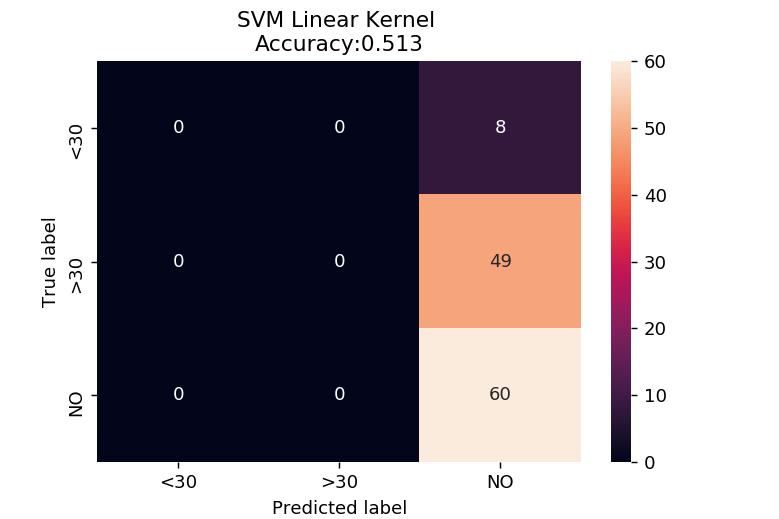

Micro-averaged precision = 0.51 (treat instances equally)
Macro-averaged precision = 0.17 (treat classes equally)
Micro-averaged f1 = 0.51 (treat instances equally)
Macro-averaged f1 = 0.23 (treat classes equally)
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         8
          1       0.00      0.00      0.00        49
          2       0.51      1.00      0.68        60

avg / total       0.26      0.51      0.35       117

CPU times: user 68.1 ms, sys: 220 µs, total: 68.3 ms
Wall time: 65.3 ms


/home/lam/anaconda2/envs/my_env3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/lam/anaconda2/envs/my_env3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/lam/anaconda2/envs/my_env3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [35]:
%%time
clf = SVC(verbose=True, kernel='poly', degree=2).fit(X_train, y_train)

print('training accuracy: {:.2f}'.format(clf.score(X_train, y_train)))
print('test accuracy: {:.2f}'.format(clf.score(X_test, y_test)))
plot_confusion(clf)

[LibSVM]training accuracy: 0.55
test accuracy: 0.54


<IPython.core.display.Javascript object>


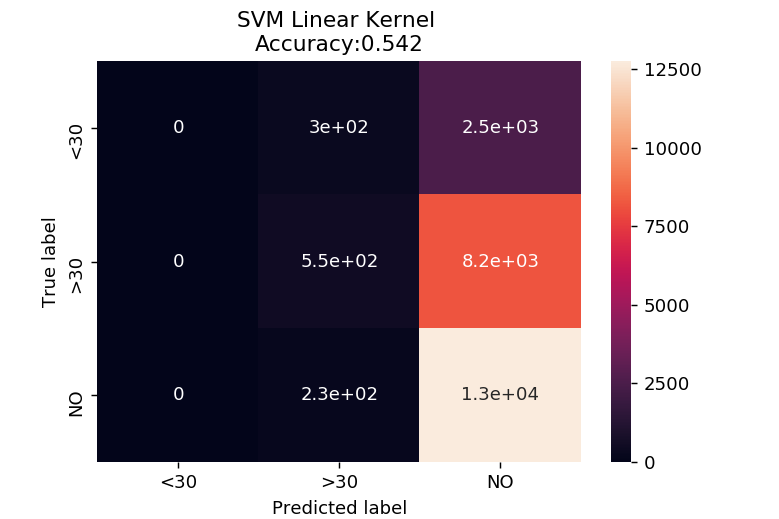

Micro-averaged precision = 0.54 (treat instances equally)
Macro-averaged precision = 0.35 (treat classes equally)
Micro-averaged f1 = 0.54 (treat instances equally)
Macro-averaged f1 = 0.27 (treat classes equally)
             precision    recall  f1-score   support

          0       0.00      0.00      0.00      2813
          1       0.51      0.06      0.11      8728
          2       0.54      0.98      0.70     12972

avg / total       0.47      0.54      0.41     24513

CPU times: user 18min 12s, sys: 306 ms, total: 18min 13s
Wall time: 18min 13s


/home/lam/anaconda2/envs/my_env3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/lam/anaconda2/envs/my_env3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/lam/anaconda2/envs/my_env3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [65]:
%%time
clf = SVC(verbose=True, kernel='sigmoid').fit(X_train, y_train)

print('training accuracy: {:.2f}'.format(clf.score(X_train, y_train)))
print('test accuracy: {:.2f}'.format(clf.score(X_test, y_test)))
plot_confusion(clf)

[LibSVM]training accuracy: 0.47
test accuracy: 0.51


<IPython.core.display.Javascript object>


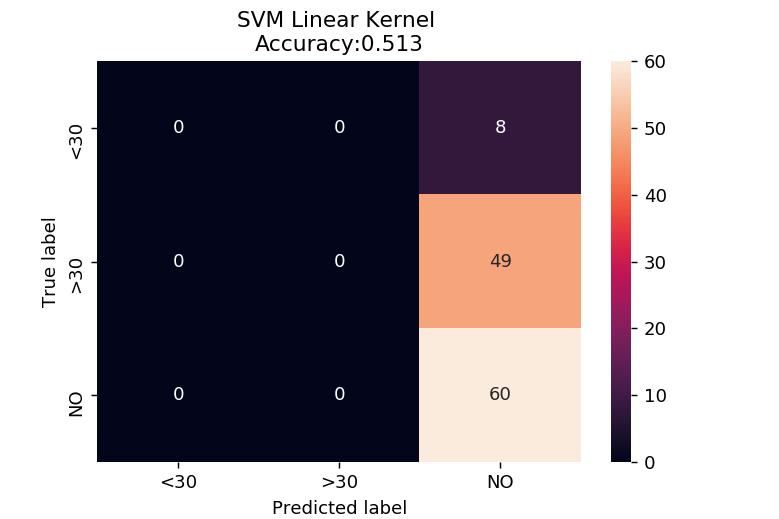

Micro-averaged precision = 0.51 (treat instances equally)
Macro-averaged precision = 0.17 (treat classes equally)
Micro-averaged f1 = 0.51 (treat instances equally)
Macro-averaged f1 = 0.23 (treat classes equally)
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         8
          1       0.00      0.00      0.00        49
          2       0.51      1.00      0.68        60

avg / total       0.26      0.51      0.35       117

CPU times: user 72 ms, sys: 3.77 ms, total: 75.8 ms
Wall time: 72.7 ms


/home/lam/anaconda2/envs/my_env3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/lam/anaconda2/envs/my_env3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/lam/anaconda2/envs/my_env3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [37]:
%%time
# clf = SVC(verbose=True, kernel='rbf').fit(X_train, np.ravel(y_train))

print('training accuracy: {:.2f}'.format(clf.score(X_train, y_train)))
print('test accuracy: {:.2f}'.format(clf.score(X_test, y_test)))
plot_confusion(clf)

## <font color=green>SVM</font>

### <font color=green>optimise over accuracy</font>

In [66]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

clf = SVC() 
# grid_values = [
#   {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
#   {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.01, 0.05, 0.1, 1, 10, 100], 'kernel': ['rbf']},
#  ]

# grid_values = [
#   {'C': [1, 10, 100, 1000], 'degree:[2, 3, 4, 5]','kernel': ['poly']},
#     {'C': [1, 10, 100, 1000], 'kernel': ['sigmoid']},
#  ]

grid_values = [
  {'C': [1, 10, 100, 1000], 'degree':[2, 3, 4, 5], 'kernel': ['poly']}
 ]

grid_clf_acc = GridSearchCV(clf, param_grid = grid_values, n_jobs=4)
grid_clf_acc.fit(X_train, np.ravel(y_train))
y_decision_fn_scores_acc = grid_clf_acc.decision_function(X_test) 

print('Grid best parameter (max. accuracy): ', grid_clf_acc.best_params_)
print('Grid best score (accuracy): ', grid_clf_acc.best_score_)

Grid best parameter (max. accuracy):  {'C': 1000, 'degree': 2, 'kernel': 'poly'}
Grid best score (accuracy):  0.5640272508464896


In [67]:
pd.DataFrame(grid_clf_acc.cv_results_).sort_values(by=['mean_test_score'], ascending=False).iloc[:,2:7]

/home/lam/anaconda2/envs/my_env3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/lam/anaconda2/envs/my_env3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/lam/anaconda2/envs/my_env3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/ho

,mean_test_score,mean_train_score,param_C,param_degree,param_kernel
12,0.564027,0.566135,1000,2,poly
13,0.562205,0.564911,1000,3,poly
8,0.559513,0.560376,100,2,poly
14,0.555188,0.556337,1000,4,poly
9,0.552795,0.553162,100,3,poly
4,0.549328,0.549566,10,2,poly
15,0.541522,0.541869,1000,5,poly
10,0.538123,0.538327,100,4,poly
5,0.535634,0.535655,10,3,poly
0,0.535294,0.535301,1,2,poly


<IPython.core.display.Javascript object>


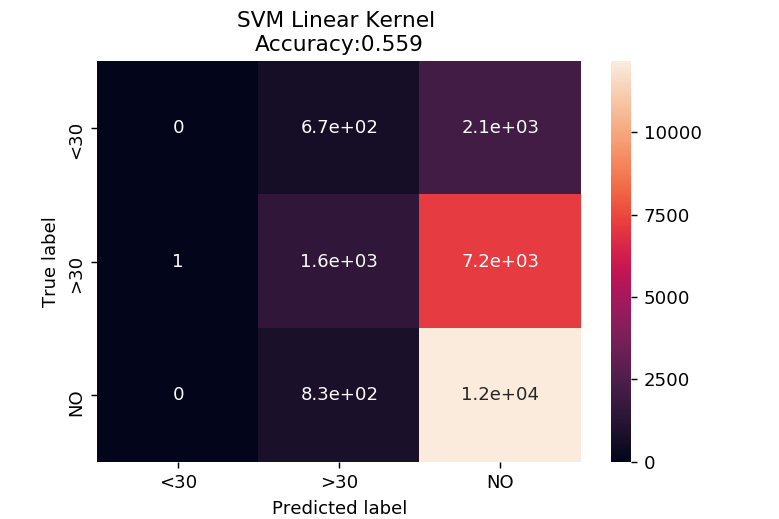

Micro-averaged precision = 0.56 (treat instances equally)
Macro-averaged precision = 0.36 (treat classes equally)
Micro-averaged f1 = 0.56 (treat instances equally)
Macro-averaged f1 = 0.32 (treat classes equally)
             precision    recall  f1-score   support

          0       0.00      0.00      0.00      2813
          1       0.51      0.18      0.26      8728
          2       0.57      0.94      0.71     12972

avg / total       0.48      0.56      0.47     24513



In [71]:
plot_confusion(grid_clf_acc)

In [69]:
y_decision_fn_scores_acc 

array([[-0.05960216,  1.01767873,  2.04192344],
       [-0.05902268,  1.01531687,  2.04370581],
       [-0.05705126,  1.02724653,  2.02980473],
       ...,
       [-0.05985299,  1.01504727,  2.04480572],
       [-0.05912816,  1.00468689,  2.05444127],
       [-0.05910686,  1.00104783,  2.05805903]])

In [70]:
# precision recall curve only for binary class